# LZW Compression Analysis

This notebook tests the '**lzw**' python package by subjecting it to compression of utf-8 files of various sizes and thereby analysing both the compression/decompression time and the resulting compression ratios.

Without loss of genrality, the compression ratio is defined to be the ratio of output file size to the input file size. 

In [13]:
import zipfile as zf
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from datetime import timedelta
import pandas as pd
from IPython.display import clear_output

#from lzw.Compress import compress as com
#from lzw.Decompress import decompress as deco
#help(deco)

In [2]:
os.chdir('/home/prathamesh/LZW-Text-File-Compressor/text_files')
for file in os.listdir():
    f = file.split('.')
    os.rename(file, str(os.path.getsize(os.getcwd()+'/'+file))+'.'+f[1])

In [6]:
os.chdir('/home/prathamesh/LZW-Text-File-Compressor/text_files')
for file in os.listdir():
    #print('File is : ',file)
    with open(file,'rb') as f:
        ch = f.read().decode('utf-8')
        #print(max([ord(c) for c in ch]))

In [3]:
from lzw.Compress import compress as com
from lzw.Decompress import decompress as deco

os.chdir('/home/prathamesh/LZW-Text-File-Compressor/text_files')
c = com('/home/prathamesh/LZW-Text-File-Compressor/text_files/238946.csv','/home/prathamesh/LZW-Text-File-Compressor/text_files',encoding='ascii_127',verbose=1)
start_time = time.monotonic()
c.encode()
end_time = time.monotonic()

print('Encode Time: '+str(timedelta(seconds=end_time-start_time)))

d = deco('/home/prathamesh/LZW-Text-File-Compressor/text_files/238946_compressed.txt','/home/prathamesh/LZW-Text-File-Compressor/text_files/',encoding='ascii_127',verbose=1)
start_time = time.monotonic()
d.decode()
end_time = time.monotonic()

print('Decode Time: '+str(timedelta(seconds=end_time-start_time)))


Reading file and preparing to compress...
Processing file in chunks of 59736bytes. Working on chunk1/4
Chunk 1/4: Execution time: 0:00:00.425223
Processing file in chunks of 59736bytes. Working on chunk2/4
Chunk 2/4: Execution time: 0:00:00.380722
Processing file in chunks of 59736bytes. Working on chunk3/4
Chunk 3/4: Execution time: 0:00:00.365236
Processing file in chunks of 59736bytes. Working on chunk4/4
Chunk 4/4: Execution time: 0:00:00.450137
Encode Time: 0:00:01.755749
Beginning to decompress...
Processing file in chunks of 78064bytes. Working on chunk1/1
Chunk 1/1: Execution time: 0:00:00.159316
Decode Time: 0:00:00.327733


In [3]:
from lzw.Compress import compress as comp
from lzw.Decompress import decompress as decomp

res_dict = dict()
res_dict['size'] = []
res_dict['comp_time'] = []
res_dict['decomp_time'] = []
res_dict['comp_size'] = []
#res_dict['formated_comp_time'] = []
#res_dict['formated_decomp_time'] = []
os.chdir('/home/prathamesh/LZW-Text-File-Compressor/text_files')
#to_comp = [_ for _ in os.listdir() if os.path.getsize(_) < 10000000]
#to_comp.pop(0)
#to_comp.pop(0)
#to_comp.pop(0)
to_comp = [_ for _ in os.listdir()]
to_comp
#results = pd.DataFrame(columns=['size'])

['623294.csv',
 '8483448.csv',
 '25463688.csv',
 '10559175.csv',
 '4123652.csv',
 '12859056.csv',
 '4572477.csv',
 '3256623.txt',
 '85425.csv',
 '793574.csv',
 '1214386.txt',
 '256276.csv',
 '123637.csv',
 '199569.txt',
 '113183.csv',
 '107698.txt',
 '5475893.csv',
 '612772.txt',
 '6476068.csv',
 '86047.csv',
 '1023385.txt',
 '238946.csv',
 '50537.txt',
 '21017659.csv']

In [4]:
comp_path = '/home/prathamesh/LZW-Text-File-Compressor/compressed/'
dec_path = '/home/prathamesh/LZW-Text-File-Compressor/decomped/'
file_path = '/home/prathamesh/LZW-Text-File-Compressor/text_files/'

#file = '595658.txt'
for file in to_comp:
    clear_output()
    print('Processing '+file)
    c = comp(file_path+file, comp_path, encoding='ascii_255', verbose=1, limit=30000000)
    start_time = time.monotonic()
    c.encode()
    end_time = time.monotonic()
    res_dict['size'].append(os.path.getsize(file_path+file))
    res_dict['comp_time'].append(end_time - start_time)
    res_dict['comp_size'].append(os.path.getsize(comp_path+file.split('.')[0]+'_compressed.txt'))
    
    
    d = decomp(comp_path+file.split('.')[0]+'_compressed.txt', dec_path, encoding='ascii_255', verbose=1, limit=30000000)
    start_time = time.monotonic()
    d.decode()
    end_time = time.monotonic()
    res_dict['decomp_time'].append(end_time - start_time)
    
    if abs(os.path.getsize(dec_path+file.split('.')[0]+'_compressed_decompressed.txt')-os.path.getsize(file_path+file)) > 10:
        print("error in file "+file)
        break

Processing 21017659.csv
Reading file and preparing to compress...
Processing file in 15 chunks of 1401177bytes each.
Working on chunk1/15
Chunk 1/15 done: Execution time: 0:00:29.547508
Working on chunk2/15
Chunk 2/15 done: Execution time: 0:01:03.396815
Working on chunk3/15
Chunk 3/15 done: Execution time: 0:01:29.408516
Working on chunk4/15
Chunk 4/15 done: Execution time: 0:01:26.930385
Working on chunk5/15
Chunk 5/15 done: Execution time: 0:02:14.221448
Working on chunk6/15
Chunk 6/15 done: Execution time: 0:01:58.828461
Working on chunk7/15
Chunk 7/15 done: Execution time: 0:01:24.638047
Working on chunk8/15
Chunk 8/15 done: Execution time: 0:01:20.581768
Working on chunk9/15
Chunk 9/15 done: Execution time: 0:01:21.548713
Working on chunk10/15
Chunk 10/15 done: Execution time: 0:05:56.435162
Working on chunk11/15
Chunk 11/15 done: Execution time: 0:02:26.317396
Working on chunk12/15
Chunk 12/15 done: Execution time: 0:02:18.464024
Working on chunk13/15
Chunk 13/15 done: Execution

In [7]:
from sklearn.externals import joblib

joblib.dump(res_dict,'/home/prathamesh/git_projects/LZW-Text-File-Compression/results/results.sav')

['/home/prathamesh/git_projects/LZW-Text-File-Compression/results/results.sav']

In [55]:
results = joblib.load('/home/prathamesh/git_projects/LZW-Text-File-Compression/results/results.sav')
results

pd_res = pd.DataFrame(results)
pd_res.describe()
pd_res = pd_res.sort_values(by='size')
pd_res.index = list(range(len(res_dict['size'])))
#pd_res
#pd_res.reindex(index=range(len(res_dict['size'])))

<function matplotlib.pyplot.show(*args, **kw)>

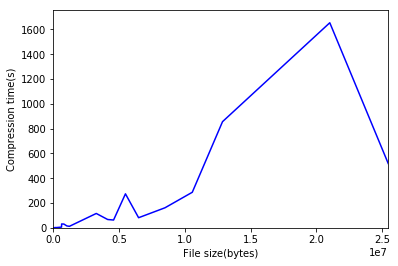

In [36]:
comp_time = pd_res.loc[:,['size','comp_time']]
plt.plot('size','comp_time','b-',data=pd_res)
plt.xlabel('File size(bytes)')
plt.ylabel('Compression time(s)')
#plt.legend('Compression Tiem','Decompression Time')
plt.axis([0,max(res_dict['size'])+100,0,max(res_dict['comp_time'])+100])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

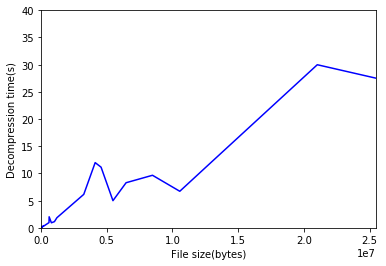

In [53]:
plt.plot('size','decomp_time','b-',data=pd_res)
plt.xlabel('File size(bytes)')
plt.ylabel('Decompression time(s)')
plt.axis([0,max(res_dict['size'])+100,0,max(res_dict['decomp_time'])+10])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

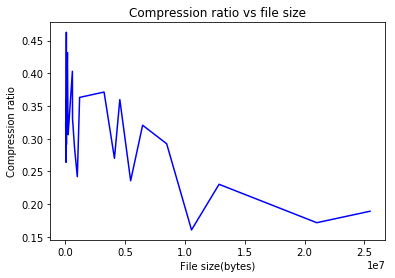

In [57]:
pd_res['comp_ratio'] = pd_res['comp_size']/pd_res['size']
plt.plot('size','comp_ratio','b-',data=pd_res)
plt.xlabel('File size(bytes)')
plt.ylabel('Compression ratio')
plt.title('Compression ratio vs file size')
plt.show

In [64]:
pd_res.to_csv('/home/prathamesh/git_projects/LZW-Text-File-Compression/results/lzw_dframe.csv',index=False)
#pdr = pd.read_csv('/home/prathamesh/git_projects/LZW-Text-File-Compression/results/lzw_dframe.csv')
joblib.dump(res_dict,'/home/prathamesh/git_projects/LZW-Text-File-Compression/results/results_dict.sav')
#j = joblib.load('/home/prathamesh/git_projects/LZW-Text-File-Compression/results/results_dict.sav')

['/home/prathamesh/git_projects/LZW-Text-File-Compression/results/results_dict.sav']